.

.

.

.

.

.

.

.

# <center>Hi!</center>

.

.

.

.

.

.

.

.
 
.

.

.

.

# List Comprehensions in Python: the How, the Why, and the What Even Are They?

# Agenda:

### What is a list comprehension?

### Why use it?

### More complicated ones

## What is a list comprehension?

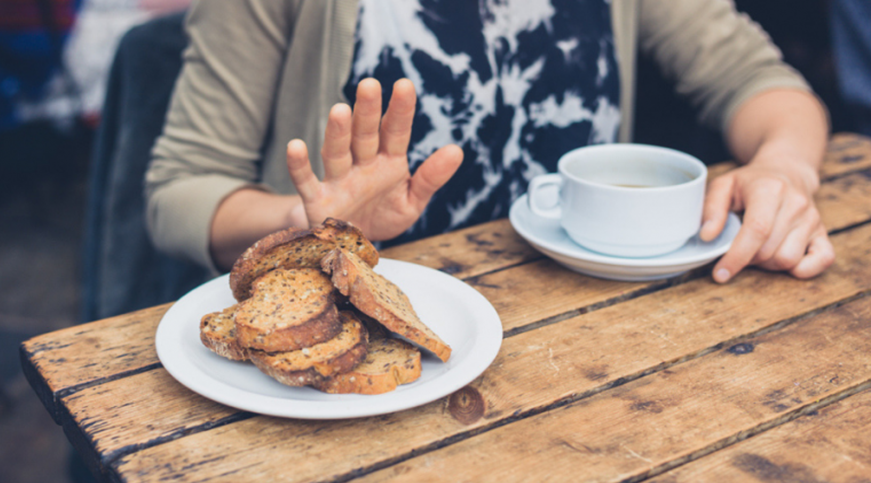

### Basics: instantiating lists

In [1]:
#By manually typing 
allergens = ['fish', 'peanuts', 'wheat', 'shellfish', 'tree nuts', 'eggs', 'milk', 'soy']

In [2]:
dishes = ['baked cod', 'pad thai', 'sandwich', 
          'fideos', 'beet hazelnut salad', 
          'frittata', 'cheese plate', 'fried tofu']

In [3]:
#By manipulating another list
sorted_allergens = sorted(allergens)

In [4]:
sorted_allergens

['eggs', 'fish', 'milk', 'peanuts', 'shellfish', 'soy', 'tree nuts', 'wheat']

In [13]:
#Step 1: instantiate an empty list
allergen_examples = []

#Step 2: iterate over a collection
for a, d in zip(allergens, dishes):
    
    #Step 3: append each item to the new list
    allergen_examples.append((f'{d.capitalize()} has {a}.'))

allergen_examples

['Baked cod has fish.',
 'Pad thai has peanuts.',
 'Sandwich has wheat.',
 'Fideos has shellfish.',
 'Beet hazelnut salad has tree nuts.',
 'Frittata has eggs.',
 'Cheese plate has milk.',
 'Fried tofu has soy.']

In [11]:
#Or, by index:
allergen_examples = []

#Don't do this:
#for i in range(len(allergens)):
    
for i, a in enumerate(allergens):
    example = f'{dishes[i].capitalize()} has {allergens[i]}.'
    allergen_examples.append(example)

allergen_examples

['Baked cod has fish.',
 'Pad thai has peanuts.',
 'Sandwich has wheat.',
 'Fideos has shellfish.',
 'Beet hazelnut salad has tree nuts.',
 'Frittata has eggs.',
 'Cheese plate has milk.',
 'Fried tofu has soy.']

In [3]:
#Not building a new list, just *doing* something
for a in allergens: #For each thing in some collection of things
    print(a.upper()) #Do something. (The action takes place here.)

FISH
PEANUTS
WHEAT
SHELLFISH
TREE NUTS
EGGS
MILK
SOY


### With a list comprehension:

In [14]:
#Verbose:
# allergen_examples = []
# for a, d in zip(allergens, dishes):
#     example_tuple = (a, d)
#     allergen_examples.append(example_tuple)

#Pithy:
allergen_examples = [f'{d.capitalize()} has {a}.' for a, d in zip(allergens, dishes)]
allergen_examples

['Baked cod has fish.',
 'Pad thai has peanuts.',
 'Sandwich has wheat.',
 'Fideos has shellfish.',
 'Beet hazelnut salad has tree nuts.',
 'Frittata has eggs.',
 'Cheese plate has milk.',
 'Fried tofu has soy.']

In [5]:
#Verbose:
#for a in allergens: 
#    print(a.upper())

#Pithy:
[a.upper() for a in allergens] #All the action inside the brackets

['FISH', 'PEANUTS', 'WHEAT', 'SHELLFISH', 'TREE NUTS', 'EGGS', 'MILK', 'SOY']

### With a dictionary comprehension:

In [11]:
# allergen_examples = {}
# for a, d in zip(allergens, dishes):
#     allergen_examples[a] = d

allergen_examples = {a: d for a, d in zip(allergens, dishes)} #All the action inside the brackets
allergen_examples

{'fish': 'baked cod',
 'peanuts': 'pad thai',
 'wheat': 'sandwich',
 'shellfish': 'fideos',
 'tree nuts': 'beet hazelnut salad',
 'eggs': 'frittata',
 'milk': 'cheese plate',
 'soy': 'fried tofu'}

In [73]:
allergen_examples = {a: dishes[i] for i, a in enumerate(allergens)}
allergen_examples

{'fish': 'baked cod',
 'peanuts': 'pad thai',
 'wheat': 'sandwich',
 'shellfish': 'fideos',
 'tree nuts': 'beet hazelnut salad',
 'eggs': 'frittata',
 'milk': 'cheese plate',
 'soy': 'fried tofu'}

## Why tho ???

### 1. Often looks cleaner.

But not always.

### 2. Time

- Faster for building lists.
- Faster than iterating over collections for which vector-wise operations are not possible.

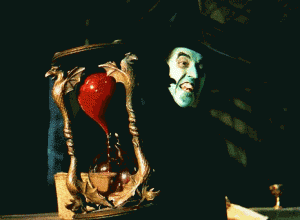

In [3]:
import numpy as np

#### Vector-wise operations are meant for numerical data

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(10) + 100 #Everybody clap your hands

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])

In [9]:
#Versus:
np.array(allergens)

array(['fish', 'peanuts', 'wheat', 'shellfish', 'tree nuts', 'eggs',
       'milk', 'soy'], dtype='<U9')

In [10]:
np.array(allergens) + '!' #Everybody clap your hands?

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U9') dtype('<U9') dtype('<U9')

In [ ]:
#Oh. Darnit.

In [11]:
#With a list comprehension:
[f'{a.capitalize()}!' for a in allergens]

['Fish!',
 'Peanuts!',
 'Wheat!',
 'Shellfish!',
 'Tree nuts!',
 'Eggs!',
 'Milk!',
 'Soy!']

In [5]:
import time

In [4]:
#A billion strings
billion_verbose = []

start = time.time()
for i in np.arange(1000000000):
    billion_verbose.append(str(i))
    
end = time.time()
print(f'{(end - start) / 60} minutes')

11.935250647862752 minutes


In [17]:
billion_verbose[:10]

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [7]:
start = time.time()
billion_pithy = [str(i) for i in np.arange(1000000000)]
end = time.time()
print(f'{(end - start) / 60} minutes')

10.605269034703573 minutes


## Complicated variants: nesting and conditional statements

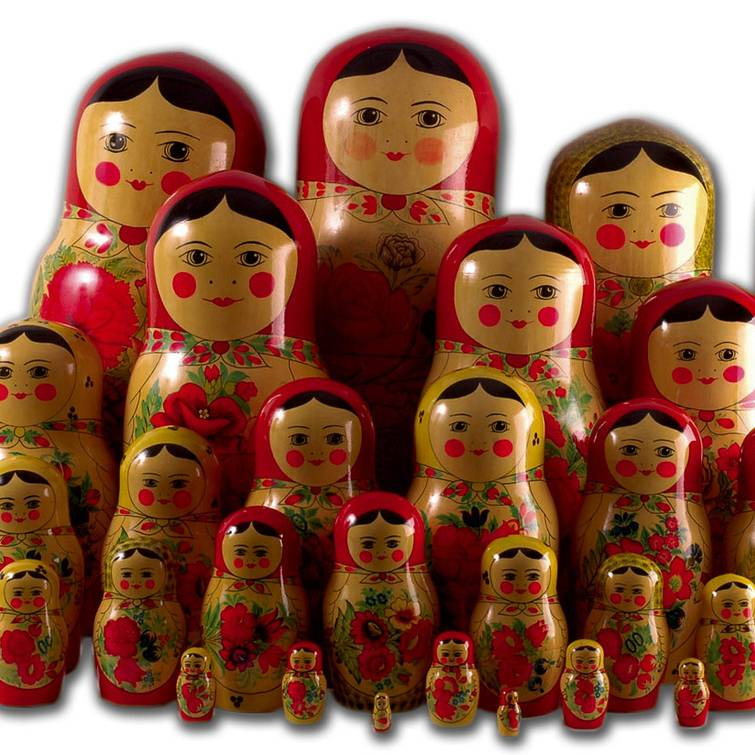

### Two counter-intuitive things to consider:
1. Smallest to biggest, then descending order
2. 'if' at the end; 'if else' at the beginning

### A catering menu for a wedding

In [4]:
menu = [
            [
                [
                    'tomato bisque', 'potato leek', 'french onion'
                ],
                [
                    'broccoli cheddar', 'gaspacho', 'minestrone'
                ],
                [
                    'carrot ginger', 'curried sweet potato', 'mulligatawny',
                ]
            ],
            [
                [
                    'caesar', 'cobb', 'nicoise'
                ],
                [
                    'larb', 'cole slaw', 'watermelon tomato'
                ],
                [
                    'mesclun', 'kale', 'lentil'
                ]
            ],
            [
               [
                    'steak au poivre', 'grilled chicken', 'salmon with dill'
                ],
                [
                    '', '', ''
                ],
               [
                    'falafel', 'cauliflower steak', 'grilled portobello'
                ]
            ],
            [
                [
                    'mashed potatoes', 'fried brussels sprouts', 'garlic bread'
                ],
                [
                    'grilled asparagus', 'roasted tomatoes', 'green beans amandine'
                ],
                [
                    'boiled new potatoes', 'curried cauliflower', 'farro salad'
                ]
            ],
            [
                [
                    'black forest cake', 'lemon bars', 'choux puffs'
                ],
                [
                    'flourless chocolate cake', 'parfaits', 'macarons'
                ],
                [
                    'sweet potato cake', 'peanut butter cookies', 'fruit salad'
                ]
            ],
        ]

In [76]:
menu

[[['tomato bisque', 'potato leek', 'french onion'],
  ['broccoli cheddar', 'gaspacho', 'minestrone'],
  ['carrot ginger', 'curried sweet potato', 'mulligatawny']],
 [['caesar', 'cobb', 'nicoise'],
  ['larb', 'cole slaw', 'watermelon tomato'],
  ['mesclun', 'kale', 'lentil']],
 [['steak au poivre', 'grilled chicken', 'salmon with dill'],
  ['', '', ''],
  ['falafel', 'cauliflower steak', 'grilled portobello']],
 [['mashed potatoes', 'fried brussels sprouts', 'garlic bread'],
  ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
  ['boiled new potatoes', 'curried cauliflower', 'farro salad']],
 [['black forest cake', 'lemon bars', 'choux puffs'],
  ['flourless chocolate cake', 'parfaits', 'macarons'],
  ['sweet potato cake', 'peanut butter cookies', 'fruit salad']]]

In [5]:
courses = ['soup', 'salad', 'main', 'sides', 'dessert']

In [6]:
styles = ['classic', 'gluten free', 'vegan']

### Need just a list of dishes: flatten the nested structure

In [2]:
#The verbose way
dishes = []

for course in menu:
    for style in course:
        for food in style:
            #if food:
            dishes.append(food)
            
dishes

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 '',
 '',
 '',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

In [79]:
#Big for big in list
[course for course in menu]

[[['tomato bisque', 'potato leek', 'french onion'],
  ['broccoli cheddar', 'gaspacho', 'minestrone'],
  ['carrot ginger', 'curried sweet potato', 'mulligatawny']],
 [['caesar', 'cobb', 'nicoise'],
  ['larb', 'cole slaw', 'watermelon tomato'],
  ['mesclun', 'kale', 'lentil']],
 [['steak au poivre', 'grilled chicken', 'salmon with dill'],
  ['', '', ''],
  ['falafel', 'cauliflower steak', 'grilled portobello']],
 [['mashed potatoes', 'fried brussels sprouts', 'garlic bread'],
  ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
  ['boiled new potatoes', 'curried cauliflower', 'farro salad']],
 [['black forest cake', 'lemon bars', 'choux puffs'],
  ['flourless chocolate cake', 'parfaits', 'macarons'],
  ['sweet potato cake', 'peanut butter cookies', 'fruit salad']]]

In [80]:
#Medium for big in LIST for medium in big
[style for course in menu for style in course]

[['tomato bisque', 'potato leek', 'french onion'],
 ['broccoli cheddar', 'gaspacho', 'minestrone'],
 ['carrot ginger', 'curried sweet potato', 'mulligatawny'],
 ['caesar', 'cobb', 'nicoise'],
 ['larb', 'cole slaw', 'watermelon tomato'],
 ['mesclun', 'kale', 'lentil'],
 ['steak au poivre', 'grilled chicken', 'salmon with dill'],
 ['', '', ''],
 ['falafel', 'cauliflower steak', 'grilled portobello'],
 ['mashed potatoes', 'fried brussels sprouts', 'garlic bread'],
 ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
 ['boiled new potatoes', 'curried cauliflower', 'farro salad'],
 ['black forest cake', 'lemon bars', 'choux puffs'],
 ['flourless chocolate cake', 'parfaits', 'macarons'],
 ['sweet potato cake', 'peanut butter cookies', 'fruit salad']]

In [91]:
#Small for big in LIST for medium in big for small in medium
[food for course in menu for style in course for food in style]

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 '',
 '',
 '',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

In [82]:
#With if statement (must be at the end)
[food for course in menu for style in course for food in style if food]

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

In [83]:
#Maybe you need placeholder values to preserve the length of the list
#With if/else statement (must be at the beginning)
[food if food else 'Not available' for course in menu for style in course for food in style]

['tomato bisque',
 'potato leek',
 'french onion',
 'broccoli cheddar',
 'gaspacho',
 'minestrone',
 'carrot ginger',
 'curried sweet potato',
 'mulligatawny',
 'caesar',
 'cobb',
 'nicoise',
 'larb',
 'cole slaw',
 'watermelon tomato',
 'mesclun',
 'kale',
 'lentil',
 'steak au poivre',
 'grilled chicken',
 'salmon with dill',
 'Not available',
 'Not available',
 'Not available',
 'falafel',
 'cauliflower steak',
 'grilled portobello',
 'mashed potatoes',
 'fried brussels sprouts',
 'garlic bread',
 'grilled asparagus',
 'roasted tomatoes',
 'green beans amandine',
 'boiled new potatoes',
 'curried cauliflower',
 'farro salad',
 'black forest cake',
 'lemon bars',
 'choux puffs',
 'flourless chocolate cake',
 'parfaits',
 'macarons',
 'sweet potato cake',
 'peanut butter cookies',
 'fruit salad']

### Need a nested dictionary with courses and styles

In [89]:
#Biggest:
courses

['soup', 'salad', 'main', 'sides', 'dessert']

In [90]:
#Medium:
styles

['classic', 'gluten free', 'vegan']

In [97]:
{course: {} for i, course in enumerate(courses)}

{'soup': {}, 'salad': {}, 'main': {}, 'sides': {}, 'dessert': {}}

In [98]:
{course: {style: () for j, style in enumerate(styles)} for i, course in enumerate(courses)}

{'soup': {'classic': (), 'gluten free': (), 'vegan': ()},
 'salad': {'classic': (), 'gluten free': (), 'vegan': ()},
 'main': {'classic': (), 'gluten free': (), 'vegan': ()},
 'sides': {'classic': (), 'gluten free': (), 'vegan': ()},
 'dessert': {'classic': (), 'gluten free': (), 'vegan': ()}}

#### Using the indices

In [95]:
{course: {style: (i,j) for j, style in enumerate(styles)} for i, course in enumerate(courses)}

{'soup': {'classic': (0, 0), 'gluten free': (0, 1), 'vegan': (0, 2)},
 'salad': {'classic': (1, 0), 'gluten free': (1, 1), 'vegan': (1, 2)},
 'main': {'classic': (2, 0), 'gluten free': (2, 1), 'vegan': (2, 2)},
 'sides': {'classic': (3, 0), 'gluten free': (3, 1), 'vegan': (3, 2)},
 'dessert': {'classic': (4, 0), 'gluten free': (4, 1), 'vegan': (4, 2)}}

In [105]:
#Our original menu
menu

[[['tomato bisque', 'potato leek', 'french onion'],
  ['broccoli cheddar', 'gaspacho', 'minestrone'],
  ['carrot ginger', 'curried sweet potato', 'mulligatawny']],
 [['caesar', 'cobb', 'nicoise'],
  ['larb', 'cole slaw', 'watermelon tomato'],
  ['mesclun', 'kale', 'lentil']],
 [['steak au poivre', 'grilled chicken', 'salmon with dill'],
  ['', '', ''],
  ['falafel', 'cauliflower steak', 'grilled portobello']],
 [['mashed potatoes', 'fried brussels sprouts', 'garlic bread'],
  ['grilled asparagus', 'roasted tomatoes', 'green beans amandine'],
  ['boiled new potatoes', 'curried cauliflower', 'farro salad']],
 [['black forest cake', 'lemon bars', 'choux puffs'],
  ['flourless chocolate cake', 'parfaits', 'macarons'],
  ['sweet potato cake', 'peanut butter cookies', 'fruit salad']]]

In [ ]:
#Using these indices to find foods on our menu
menu[0][0]

In [4]:
menu[0][0]

['tomato bisque', 'potato leek', 'french onion']

#### Putting it all together

In [84]:
{course: {style: [food for food in menu[i][j]] for j, style in enumerate(styles)} for i, course in enumerate(courses)}

{'soup': {'classic': ['tomato bisque', 'potato leek', 'french onion'],
  'gluten free': ['broccoli cheddar', 'gaspacho', 'minestrone'],
  'vegan': ['carrot ginger', 'curried sweet potato', 'mulligatawny']},
 'salad': {'classic': ['caesar', 'cobb', 'nicoise'],
  'gluten free': ['larb', 'cole slaw', 'watermelon tomato'],
  'vegan': ['mesclun', 'kale', 'lentil']},
 'main': {'classic': ['steak au poivre',
   'grilled chicken',
   'salmon with dill'],
  'gluten free': ['', '', ''],
  'vegan': ['falafel', 'cauliflower steak', 'grilled portobello']},
 'sides': {'classic': ['mashed potatoes',
   'fried brussels sprouts',
   'garlic bread'],
  'gluten free': ['grilled asparagus',
   'roasted tomatoes',
   'green beans amandine'],
  'vegan': ['boiled new potatoes', 'curried cauliflower', 'farro salad']},
 'dessert': {'classic': ['black forest cake', 'lemon bars', 'choux puffs'],
  'gluten free': ['flourless chocolate cake', 'parfaits', 'macarons'],
  'vegan': ['sweet potato cake', 'peanut butter

# <center>Nice.</center>

# <center>The end! Thank you for joining.</center>

### Join me on the social things:

### http://linkedin.com/in/ssrosa

### http://github.com/ssrosa

### http://medium.com/@ssrosa